In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [35]:
path = '../kaggle_data/input/'

In [36]:
train = pd.read_csv(path+'train.csv')
weather = pd.read_csv(path+'weather.csv')
spray = pd.read_csv(path+'spray.csv')
test = pd.read_csv(path+'test.csv')
sample_sub = pd.read_csv(path+'sampleSubmission.csv')

In [4]:
sample_sub.head()

,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [5]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [6]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [7]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [8]:
# Let's create a function to run through EDA for the various data sets

def eda(dataset):
    print("Dataset Types \n", dataset.dtypes)
    print("Dataset Index \n", dataset.index)
    print("Dataset Shape \n", dataset.shape)
    print("Missing Values \n", dataset.isnull().sum())
    print("Dataset Describe \n", dataset.describe())
    print("Dataset Duplicates \n", dataset.duplicated().sum())
    for item in dataset:
        print(item)
        print(dataset[item].nunique())

In [9]:
eda(train)

Dataset Types 
 Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object
Dataset Index 
 RangeIndex(start=0, stop=10506, step=1)
Dataset Shape 
 (10506, 12)
Missing Values 
 Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64
Dataset Describe 
               Block      Latitude     Longitude  AddressAccuracy  \
count  10506.000000  1050

In [10]:
eda(spray)

Dataset Types 
 Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object
Dataset Index 
 RangeIndex(start=0, stop=14835, step=1)
Dataset Shape 
 (14835, 4)
Missing Values 
 Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64
Dataset Describe 
            Latitude     Longitude
count  14835.000000  14835.000000
mean      41.904828    -87.736690
std        0.104381      0.067292
min       41.713925    -88.096468
25%       41.785001    -87.794225
50%       41.940075    -87.727853
75%       41.980978    -87.694108
max       42.395983    -87.586727
Dataset Duplicates 
 541
Date
10
Time
8583
Latitude
12887
Longitude
13007


In [11]:
train.drop_duplicates()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [12]:
spray.drop_duplicates()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
5,2011-08-29,6:57:48 PM,42.390395,-88.088315
6,2011-08-29,6:57:58 PM,42.390673,-88.088002
7,2011-08-29,6:58:08 PM,42.391027,-88.088002
8,2011-08-29,6:58:18 PM,42.391403,-88.088003
9,2011-08-29,6:58:28 PM,42.391718,-88.087995


In [13]:
eda(weather)

Dataset Types 
 Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object
Dataset Index 
 RangeIndex(start=0, stop=2944, step=1)
Dataset Shape 
 (2944, 22)
Missing Values 
 Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed

In [14]:
# Creating a bar chart of the number of mosquitoes based on their species and whether they carry WNV or not

train['Species']
train['Species'] = train['Species'].str.replace('CULEX ', '')


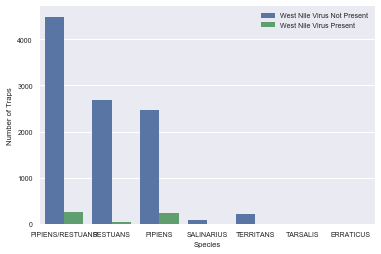

In [15]:
sns.set(font_scale=0.7)
sns.countplot(x='Species', hue='WnvPresent', data=train)
plt.xticks(rotation=0)
plt.legend(['West Nile Virus Not Present', 'West Nile Virus Present'], loc=1)
plt.ylabel('Number of Traps')
plt.show()

In [16]:
train["Date"] = pd.to_datetime(train["Date"], infer_datetime_format=True)

In [17]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['day_of_year']= train['Date'].dt.dayofyear


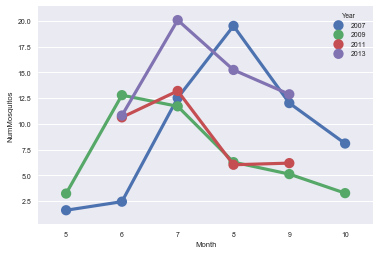

In [18]:
ax = sns.pointplot(x='Month', y="NumMosquitos", hue="Year", data=train.groupby(['Year', 'Month'], as_index=False)['NumMosquitos'].mean())

plt.show()

In [19]:
#Next, we'll create a heat map to see the strength of correlations between variables
columns = train[['Latitude', 'Longitude']]

In [20]:
mos = train.drop(columns, inplace=False, axis=1)

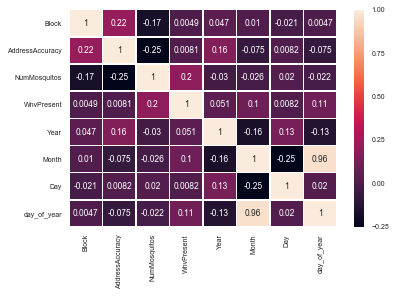

In [21]:
sns.heatmap(mos.corr(), annot = True, linewidths = 0.5)

In [22]:
import seaborn as sns; sns.set()

In [23]:
train = train.replace(to_replace={'Month': {1: 'January',2: 'February',3: 'March',4: 'April', 5: 'May',6: 'June',7: 'July',8: 'August',9: 'September'
                                   ,10: 'October',11: 'November',12: 'December'}})

In [24]:
mos_month = train[['NumMosquitos', 'WnvPresent', 'Year','Month']]
mos_month.set_index(['NumMosquitos', 'WnvPresent', 'Year','Month'], append=True)

,,,,
,NumMosquitos,WnvPresent,Year,Month
0,1,0,2007,May
1,1,0,2007,May
2,1,0,2007,May
3,1,0,2007,May
4,4,0,2007,May
5,2,0,2007,May
6,1,0,2007,May
7,1,0,2007,May
8,2,0,2007,May


In [37]:
train['Zip Code'] = train['Address'].str[-10:-5]

In [26]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Day,day_of_year,Zip Code
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,May,29,149,60634
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,May,29,149,60634
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,May,29,149,60646
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,May,29,149,60656
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,May,29,149,60656


In [41]:
train['Zip Code'].value_counts()

o, IL    1508
60666     750
60617     734
60634     502
60638     455
60646     393
60609     375
60643     321
60608     300
60639     265
60622     238
60655     237
60651     232
60632     230
60623     223
60618     214
60614     207
60707     185
60803     183
60630     183
60631     171
60637     166
60612     157
60656     153
60607     151
60106     140
60629     137
60652     126
60659     117
60619     113
60633     112
60620     111
60654     110
60625      98
60636      91
60641      89
60626      85
60642      85
60649      83
60018      80
60645      69
60621      62
60660      56
60613      54
60611      29
60605      26
60628      25
60640      21
60615      20
60827      17
60647      17
Name: Zip Code, dtype: int64

In [32]:
train[train['Zip Code'].str.contains("o, IL", na=False)]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Day,day_of_year,Zip Code
58,2007-06-05,"South Vincennes Avenue, Chicago, IL, USA",RESTUANS,10,S VINCENNES,T089,"1000 S VINCENNES, Chicago, IL",41.723195,-87.649970,5,1,0,2007,June,5,156,"o, IL"
69,2007-06-05,"Chicago, IL, USA",RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,3,0,2007,June,5,156,"o, IL"
127,2007-06-26,"Chicago, IL, USA",RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,2007,June,26,177,"o, IL"
172,2007-06-29,"South Vincennes Avenue, Chicago, IL, USA",RESTUANS,10,S VINCENNES,T089,"1000 S VINCENNES, Chicago, IL",41.723195,-87.649970,5,2,0,2007,June,29,180,"o, IL"
179,2007-06-29,"Chicago, IL, USA",RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,2007,June,29,180,"o, IL"
193,2007-06-29,"6400 West Strong Street, Chicago, IL, USA",RESTUANS,64,W STRONG ST,T014,"6400 W STRONG ST, Chicago, IL",41.970248,-87.787992,8,1,0,2007,June,29,180,"o, IL"
228,2007-07-02,"South Vincennes Avenue, Chicago, IL, USA",PIPIENS/RESTUANS,10,S VINCENNES,T089,"1000 S VINCENNES, Chicago, IL",41.723195,-87.649970,5,1,0,2007,July,2,183,"o, IL"
237,2007-07-02,"Chicago, IL, USA",SALINARIUS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,2007,July,2,183,"o, IL"
265,2007-07-02,"6400 West Strong Street, Chicago, IL, USA",PIPIENS/RESTUANS,64,W STRONG ST,T014,"6400 W STRONG ST, Chicago, IL",41.970248,-87.787992,8,5,0,2007,July,2,183,"o, IL"
266,2007-07-02,"6400 West Strong Street, Chicago, IL, USA",RESTUANS,64,W STRONG ST,T014,"6400 W STRONG ST, Chicago, IL",41.970248,-87.787992,8,1,0,2007,July,2,183,"o, IL"


In [28]:
zips = pd.read_csv('/Users/m.arthurbentil/Downloads/Chicago Zip Code Lat-Long Data Set.csv')

In [29]:
zips.head()

,Zip Code,Latitude,Longitude
0,60002,42.471741,-88.084493
1,60004,42.112780,-87.979542
2,60005,42.064490,-87.985462
3,60007,42.008600,-87.997340
4,60008,42.069786,-88.016221


In [30]:
zips.dtypes

Zip Code       int64
Latitude     float64
Longitude    float64
dtype: object

In [168]:
def zip_code_add(dataframe_1, dataframe_2):
    ZC=[]
    for i in dataframe_1, dataframe_2:
        if dataframe_1['Latitude'][i][0:4]==dataframe_2['Latitude'][i][0:4] & dataframe_1['Longitude'][i][0:4]==dataframe_2['Longitude'][i][0:4]:
            ZC = ZC.append(dataframe_2['Zip Code'][i])
        return results
            
        

In [171]:
zip_code_add(train, zips)

TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column